<a href="https://colab.research.google.com/github/Saisrujan4/AI/blob/main/Polynomial_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:


from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import numpy as np
import math as mt
import random
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Assignment 4 dataset')
data.head()


,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [27]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers 


In [28]:

sample_outliers_X = detect_outliers_zscore(data['X'])
sample_outliers_Y = detect_outliers_zscore(data['Y'])
print("Outliers in X column from Z-scores method: ", sample_outliers_X)
print("Outliers in Y column from Z-scores method: ", sample_outliers_Y)




Outliers in X column from Z-scores method:  []
Outliers in Y column from Z-scores method:  []


In [29]:

from scipy.stats import zscore
zX = np.abs(zscore(data['X']))
zY = np.abs(zscore(data['Y']))
data['ZscoreX'] = zX
data['ZscoreY'] = zY
outliers_X=len(data[data['ZscoreX']>3])
outliers_Y=len(data[data['ZscoreY']>3])
data_z = data[data['ZscoreX']<3]
data=data_z.drop(['ZscoreX', 'ZscoreY'], axis=1)
data

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171
5,7.8,143
6,7.3,217
7,8.0,190
8,7.1,142
9,7.5,190


In [9]:
print(data.isnull().sum())



X    0
Y    0
dtype: int64


In [30]:
m1=data['X'].mean()
m2=data['Y'].mean()
data['X'].fillna(value=m1, inplace=True)
data['Y'].fillna(value=m2, inplace=True)
data


,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171
5,7.8,143
6,7.3,217
7,8.0,190
8,7.1,142
9,7.5,190


In [31]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.X, data.Y, test_size = 0.10, random_state = 10)


In [32]:

m1=random.uniform(-10,10)
m2=random.uniform(-10,10)
c=random.uniform(-10,10)
eta=0.00001
max_iter=100000
def gradient(m1,m2,c,x,y):
  m1_deriv=-1*(y-m1*x*x-m2*x-c)*x*x
  m2_deriv=-1*(y-m1*x*x-m2*x-c)*x
  c_deriv=-1*(y-m1*x*x-m2*x-c)
  return m1_deriv,m2_deriv,c_deriv


In [33]:
for iter in range(max_iter):
  for sample in range(x_train.shape[0]):
    del_m1,del_m2,del_c=gradient(m1, m2, c, x_train.iloc[sample], y_train.iloc[sample])
    m1=m1-eta*del_m1
    m2=m2-eta*del_m2
    c=c-eta*del_c
print('Model parameters m1, m2, c : ',m1,m2,c)



Model parameters m1, m2, c :  -7.728596888076139 75.34500316008607 17.139016765431524


In [34]:

y_pred_train = []
for i in x_train:
  y_p_tr = (m1 * i*i)+(m2 * i) + c
  y_pred_train.append(y_p_tr)
y_pred_train = np.array(y_pred_train)


In [35]:
y_pred_test = []
for i in x_test:
  y_p_te = (m1 * i*i)+(m2 * i) + c
  y_pred_test.append(y_p_te)
y_pred_test = np.array(y_pred_test)


In [36]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


In [37]:
#Training Accuracies
mse = (mean_squared_error(y_train, y_pred_train)) 
print('Mean square error ', mse) 
rmse = math.sqrt(mean_squared_error(y_train, y_pred_train)) 
print('Root mean square error ', rmse) 
mae = mean_absolute_error(y_train, y_pred_train)
print('Mean absolute error ', mae)


Mean square error  2563.3286960342007
Root mean square error  50.6293264426281
Mean absolute error  43.052348471894305


In [38]:
#Testing Accuracies
mse = mean_squared_error(y_test, y_pred_test)
print('Mean square error ', mse)
rmse = math.sqrt(mean_squared_error(y_test, y_pred_test)) 
print('Root mean square error ', rmse)  
mae = mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error ', mae)


Mean square error  3590.409171943495
Root mean square error  59.92002313036515
Mean absolute error  56.85733941307974


In [39]:

x = input("Enter pH Value of Water : ")
y = m1*float(x)*float(x)+m2*float(x)+c
print("Bicarbonates Value of Water : ", y)


Enter pH Value of Water : 5
Bicarbonates Value of Water :  200.6491103639584


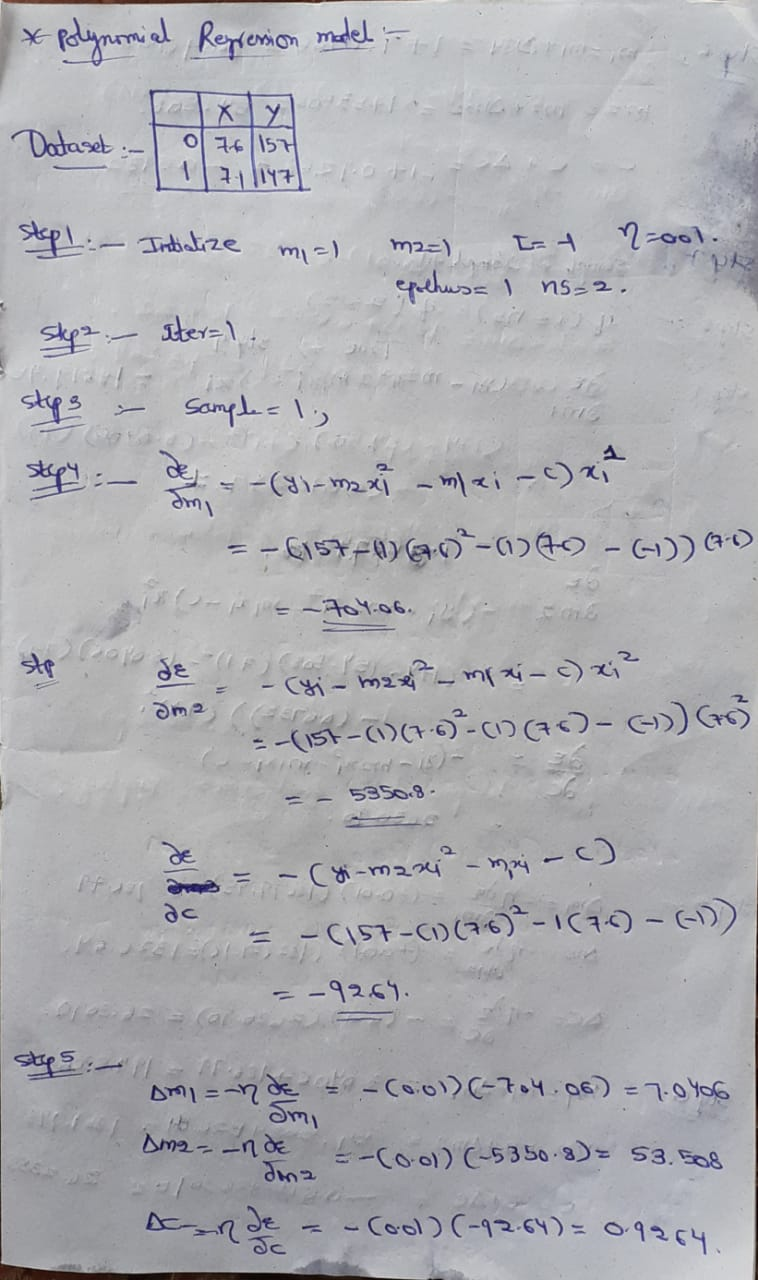

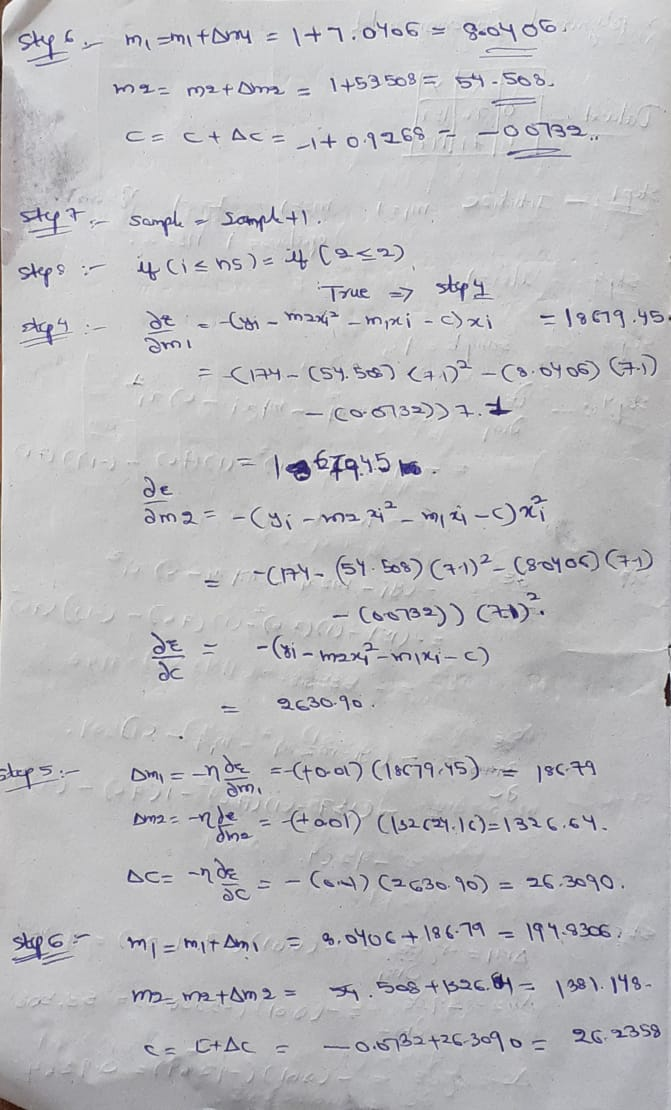

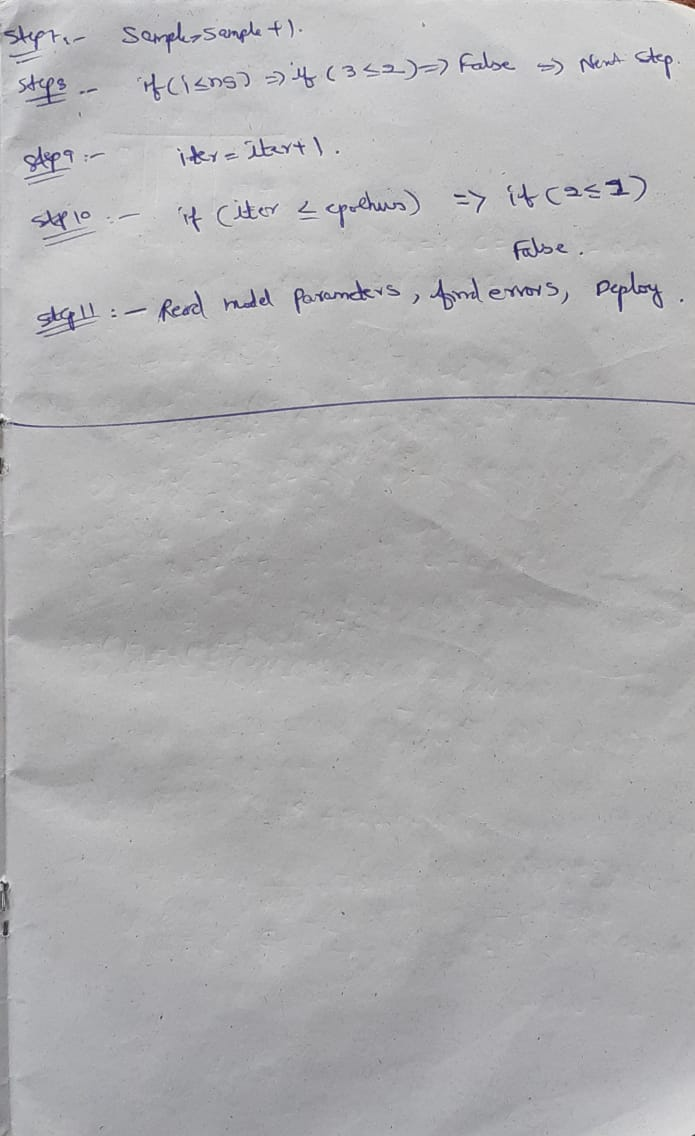